<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Activity_Recognition_EEG_2022_12_21_(edited).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')


def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys


!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/EEG_CNU_Activity Recognition/EEG_CNU_Resting, walking, working and Reading_Control_2022.12.05.csv")
 
dataset=pd.read_excel("/content/drive/MyDrive/Iqram Sir/EEG_CNU_Resting, walking, working and Reading_Control_2022.12.22.xlsx")

classes = np.array(sorted(list(set(dataset.iloc[:, 1]))))
target = "Activity"
result = {}

In [3]:
dataset.head()

,Activity,Status,Epoch,MeanP_Alpha_Fz,MedianF_Alpha_Fz,MeanF_Alpha_Fz,Spectral Edge_Alpha_Fz,PeakF_Alpha_Fz,MeanP_Beta_Fz,MedianF_Beta_Fz,...,Relative Power_Alpha_Global,Relative Power_Beta_Global,Relative Power_Theta_Global,Relative Power_Delta_Global,Relative Power_Gamma_Global,∆Relative Power_Alpha_Global,∆Relative Power_Beta_Global,∆Relative Power_Theta_Global,∆Relative Power_Delta_Global,∆Relative Power_Gamma_Global
0,Resting,Control,0,0.000008,11.70732,28.29268,20.00000,10.73171,0.000017,19.51220,...,0.358154,0.639771,0.749628,4.031903,0.220545,-0.273666,-0.164639,-0.009611,0.107193,-0.356230
1,Resting,Control,1,0.000010,10.73171,28.78049,22.43902,10.24390,0.000023,22.92683,...,0.457695,0.806208,0.723662,3.759249,0.253186,-0.071797,0.052680,-0.043916,0.032320,-0.260950
2,Resting,Control,2,0.000008,13.17073,28.78049,23.41463,9.26829,0.000023,22.43902,...,0.501419,1.059244,0.737332,3.320235,0.381769,0.016875,0.383074,-0.025855,-0.088237,0.114385
3,Resting,Control,3,0.000011,10.24390,27.80488,18.53659,10.73171,0.000019,22.43902,...,0.497909,0.710690,0.907816,3.653423,0.230162,0.009757,-0.072039,0.199384,0.003259,-0.328157
4,Resting,Control,4,0.000007,10.73171,23.41463,18.04878,11.70732,0.000010,17.56098,...,0.429825,0.569204,0.849345,4.001597,0.150029,-0.128318,-0.256780,0.122134,0.098870,-0.562065


In [4]:
dataset.shape

(1711, 259)

In [11]:
dataset[target].value_counts()

0    793
2    408
3    267
1    243
Name: Activity, dtype: int64

In [5]:
set(list(dataset[target]))

{'Reading', 'Resting', 'Walking', 'Working'}

In [6]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [7]:
set(list(dataset['Activity']))

{0, 1, 2, 3}

#Spliting into X and y

In [ ]:
X =  dataset.loc[:,dataset.columns != target]  # removing Activity 
X =  X.loc[:,X.columns != "Status"]            # removing Status
X =  X.loc[:,X.columns != "Epoch"]             # removing Epoch
y = dataset["Activity"]

X.head(10)

In [14]:
new_dataset =  balance(X,y)

#Feature Selection

In [15]:
number_of_feat = 20

Run only one Method

###ANOVA with f classifciation

In [16]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA'] 

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])

###Embedded Method

In [ ]:

from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

list_of_feat=[]


for i in range(coef.shape[0]):
  if coef[i]!=0:
    list_of_feat.append(dataset.iloc[:0,i+3].name)
    
df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Embedded_Method.csv")

list_of_feat = list(df["Best_Features"])

###Pearson's with f regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd


fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_pearsons'] 


lyst = featureScores.nlargest(number_of_feat,'Score_pearsons')

#lyst.to_csv('Filter_Method_Pearson’s_with_f_regression.csv')

list_of_feat = list(lyst["Best_columns"])

###Sequential Feature Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X, y)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(X.columns))

df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Filter_Method_Sequential_feat_Selection_KNN.csv")

list_of_feat = list(df["Best_Features"])

###All features

In [ ]:
list_of_feat = list(X.columns)

#Dataset Spliting

In [17]:
X_new = new_dataset[list_of_feat]
y_new = new_dataset[target]

In [18]:
X_new.shape

(3172, 20)

In [19]:
y_new.shape

(3172,)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)



---





---



#ADABOOST

In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[ 91  38  27   7]
 [ 54  68  14   9]
 [ 31  26  74  37]
 [ 20  14  15 110]]
              precision    recall  f1-score   support

           0       0.46      0.56      0.51       163
           1       0.47      0.47      0.47       145
           2       0.57      0.44      0.50       168
           3       0.67      0.69      0.68       159

    accuracy                           0.54       635
   macro avg       0.54      0.54      0.54       635
weighted avg       0.55      0.54      0.54       635

Accurecy:  0.5401574803149606


1/200 round completed......................... Accurecy: 0.4031496062992126
2/200 round completed......................... Accurecy: 0.48031496062992124
3/200 round completed......................... Accurecy: 0.48503937007874015
4/200 round completed......................... Accurecy: 0.494488188976378
5/200 round completed......................... Accurecy: 0.49921259842519683
6/200 round completed......................... Accurecy: 0.5401574803149606
7/200 round completed......................... Accurecy: 0.5464566929133858
8/200 round completed......................... Accurecy: 0.5181102362204725
9/200 round completed......................... Accurecy: 0.552755905511811
10/200 round completed......................... Accurecy: 0.5401574803149606
11/200 round completed......................... Accurecy: 0.5622047244094488
12/200 round completed......................... Accurecy: 0.5606299212598426
13/200 round completed......................... Accurecy: 0.5622047244094488
14/200 

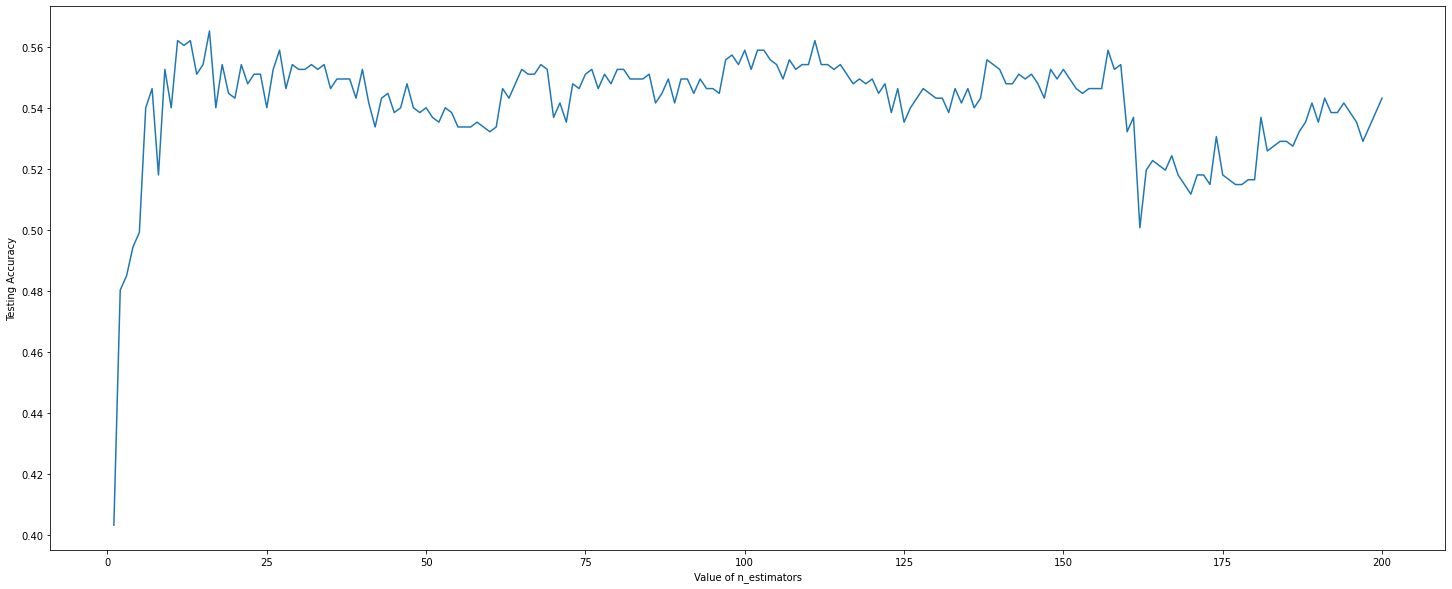

In [22]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[102  28  24   9]
 [ 57  66  13   9]
 [ 38  24  73  33]
 [ 16   9  16 118]]
              precision    recall  f1-score   support

           0       0.48      0.63      0.54       163
           1       0.52      0.46      0.49       145
           2       0.58      0.43      0.50       168
           3       0.70      0.74      0.72       159

    accuracy                           0.57       635
   macro avg       0.57      0.56      0.56       635
weighted avg       0.57      0.57      0.56       635

Accurecy:  0.5653543307086614




---



---



#Graddient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[122  21  14   6]
 [ 22 110   9   4]
 [ 25  14 108  21]
 [ 12  12  10 125]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       163
           1       0.70      0.76      0.73       145
           2       0.77      0.64      0.70       168
           3       0.80      0.79      0.79       159

    accuracy                           0.73       635
   macro avg       0.74      0.73      0.73       635
weighted avg       0.74      0.73      0.73       635

Accurecy:  0.7322834645669292


1/150 round completed......................... Accurecy: 0.568503937007874
2/150 round completed......................... Accurecy: 0.5748031496062992
3/150 round completed......................... Accurecy: 0.5763779527559055
4/150 round completed......................... Accurecy: 0.5826771653543307
5/150 round completed......................... Accurecy: 0.5811023622047244
6/150 round completed......................... Accurecy: 0.5826771653543307
7/150 round completed......................... Accurecy: 0.5889763779527559
8/150 round completed......................... Accurecy: 0.5889763779527559
9/150 round completed......................... Accurecy: 0.6015748031496063
10/150 round completed......................... Accurecy: 0.6
11/150 round completed......................... Accurecy: 0.5984251968503937
12/150 round completed......................... Accurecy: 0.6047244094488189
13/150 round completed......................... Accurecy: 0.6078740157480315
14/150 round completed..

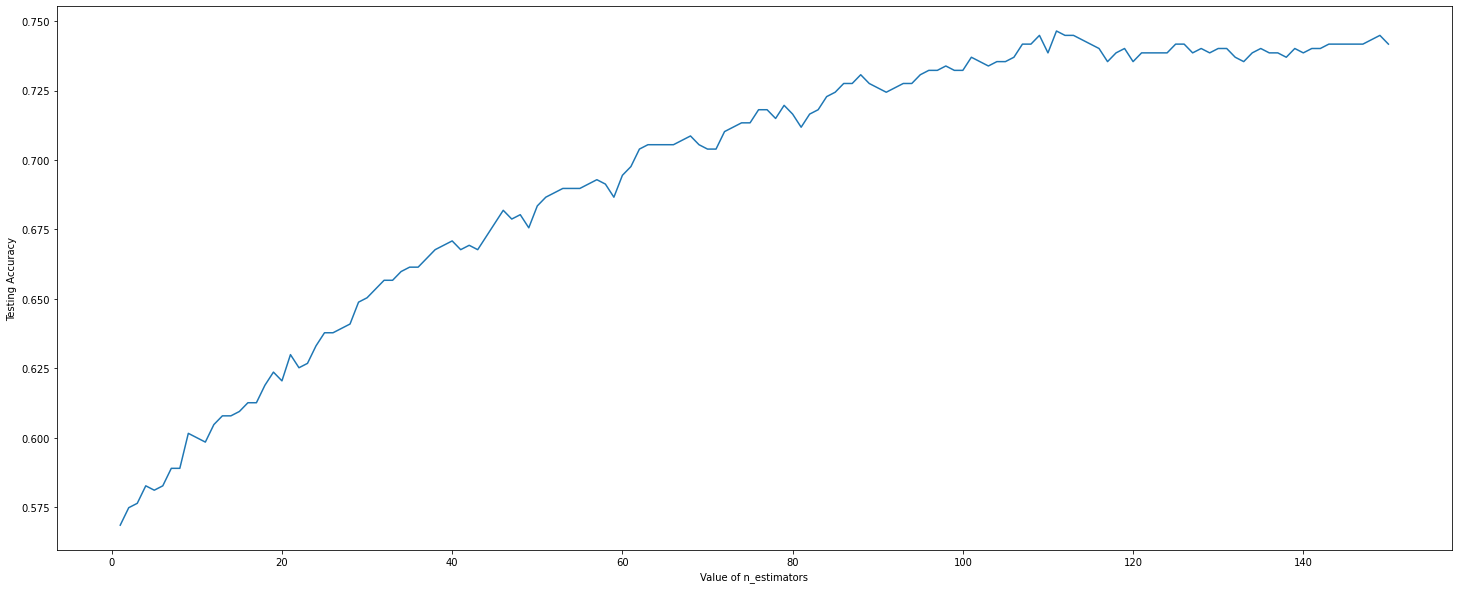

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.5700787401574803
2/30 round completed......................... Accurecy: 0.6645669291338583
3/30 round completed......................... Accurecy: 0.7322834645669292
4/30 round completed......................... Accurecy: 0.7196850393700788
5/30 round completed......................... Accurecy: 0.7385826771653543
6/30 round completed......................... Accurecy: 0.7354330708661417
7/30 round completed......................... Accurecy: 0.7559055118110236
8/30 round completed......................... Accurecy: 0.7480314960629921
9/30 round completed......................... Accurecy: 0.7496062992125985
10/30 round completed......................... Accurecy: 0.7637795275590551
11/30 round completed......................... Accurecy: 0.7700787401574803
12/30 round completed......................... Accurecy: 0.768503937007874
13/30 round completed......................... Accurecy: 0.7700787401574803
14/30 round completed.

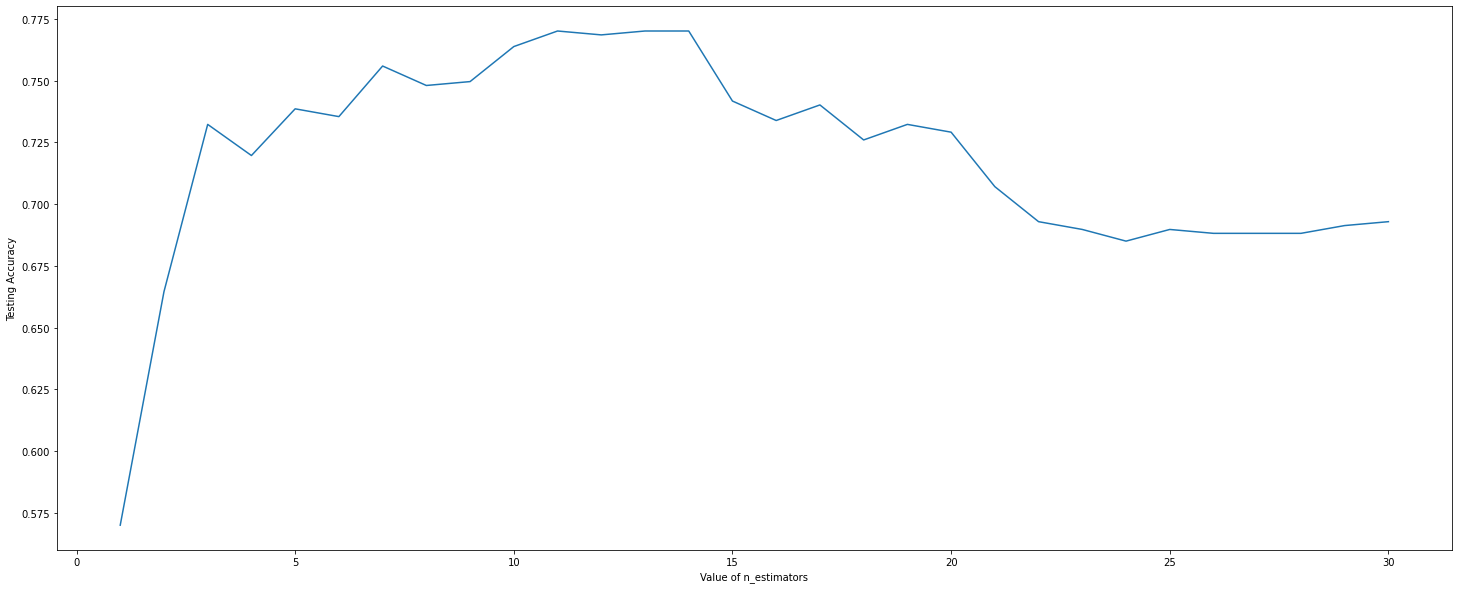

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[126  17  16   4]
 [ 21 112   8   4]
 [ 24  14 109  21]
 [ 11  12   9 127]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       163
           1       0.72      0.77      0.75       145
           2       0.77      0.65      0.70       168
           3       0.81      0.80      0.81       159

    accuracy                           0.75       635
   macro avg       0.75      0.75      0.75       635
weighted avg       0.75      0.75      0.75       635

Accurecy:  0.7464566929133858


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[126  18  18   1]
 [ 18 118   7   2]
 [ 18  15 121  14]
 [ 11   9  15 124]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       163
           1       0.74      0.81      0.77       145
           2       0.75      0.72      0.74       168
           3       0.88      0.78      0.83       159

    accuracy                           0.77       635
   macro avg       0.77      0.77      0.77       635
weighted avg       0.77      0.77      0.77       635

Accurecy:  0.7700787401574803


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[126  18  18   1]
 [ 18 119   6   2]
 [ 18  15 120  15]
 [ 10   9  14 126]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       163
           1       0.74      0.82      0.78       145
           2       0.76      0.71      0.74       168
           3       0.88      0.79      0.83       159

    accuracy                           0.77       635
   macro avg       0.78      0.78      0.77       635
weighted avg       0.78      0.77      0.77       635

Accurecy:  0.7732283464566929




---



---



#Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[124  18  20   1]
 [ 22 115   7   1]
 [ 20  13 115  20]
 [ 11   5  18 125]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       163
           1       0.76      0.79      0.78       145
           2       0.72      0.68      0.70       168
           3       0.85      0.79      0.82       159

    accuracy                           0.75       635
   macro avg       0.76      0.76      0.76       635
weighted avg       0.76      0.75      0.75       635

Accurecy:  0.7543307086614173


1/150 round completed......................... Accurecy: 0.5984251968503937
2/150 round completed......................... Accurecy: 0.6031496062992125
3/150 round completed......................... Accurecy: 0.6503937007874016
4/150 round completed......................... Accurecy: 0.658267716535433
5/150 round completed......................... Accurecy: 0.6661417322834645
6/150 round completed......................... Accurecy: 0.6834645669291338
7/150 round completed......................... Accurecy: 0.6866141732283465
8/150 round completed......................... Accurecy: 0.7070866141732284
9/150 round completed......................... Accurecy: 0.7118110236220473
10/150 round completed......................... Accurecy: 0.7149606299212599
11/150 round completed......................... Accurecy: 0.7165354330708661
12/150 round completed......................... Accurecy: 0.710236220472441
13/150 round completed......................... Accurecy: 0.710236220472441
14/150 roun

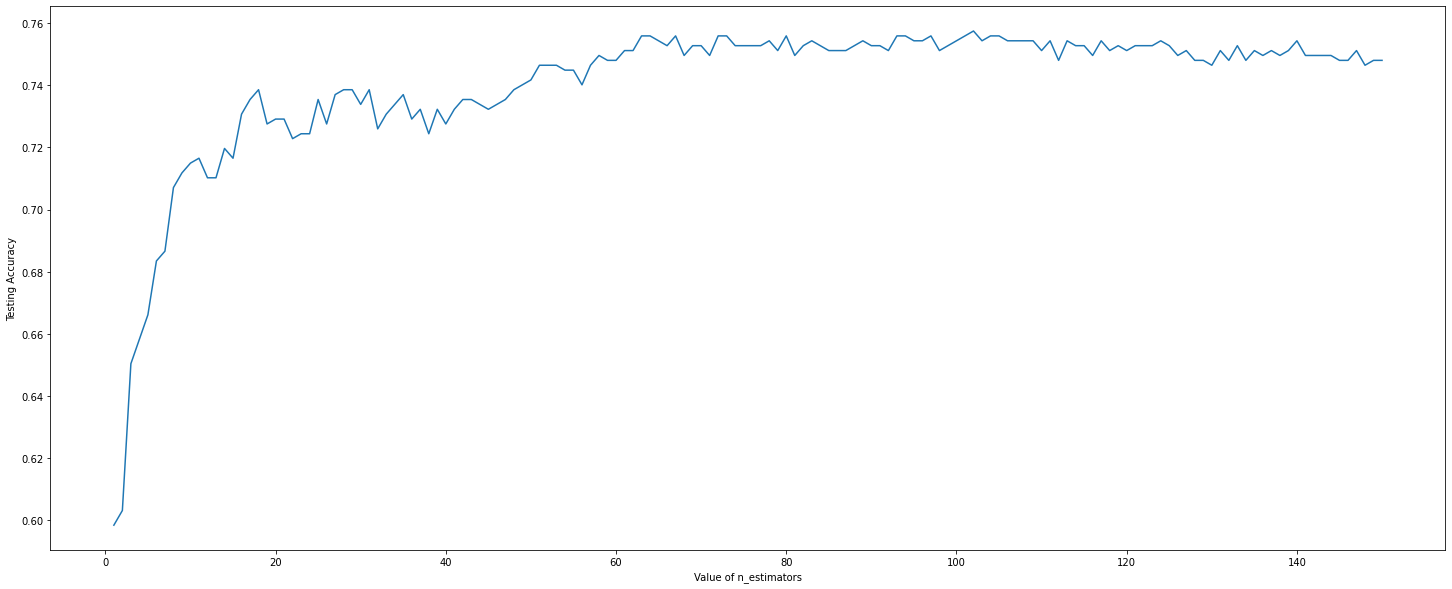

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.3952755905511811
2/150 round completed......................... Accurecy: 0.537007874015748
3/150 round completed......................... Accurecy: 0.5858267716535434
4/150 round completed......................... Accurecy: 0.6110236220472441
5/150 round completed......................... Accurecy: 0.6267716535433071
6/150 round completed......................... Accurecy: 0.6566929133858268
7/150 round completed......................... Accurecy: 0.6771653543307087
8/150 round completed......................... Accurecy: 0.6960629921259842
9/150 round completed......................... Accurecy: 0.705511811023622
10/150 round completed......................... Accurecy: 0.7133858267716535
11/150 round completed......................... Accurecy: 0.7401574803149606
12/150 round completed......................... Accurecy: 0.7496062992125985
13/150 round completed......................... Accurecy: 0.7496062992125985
14/150 rou

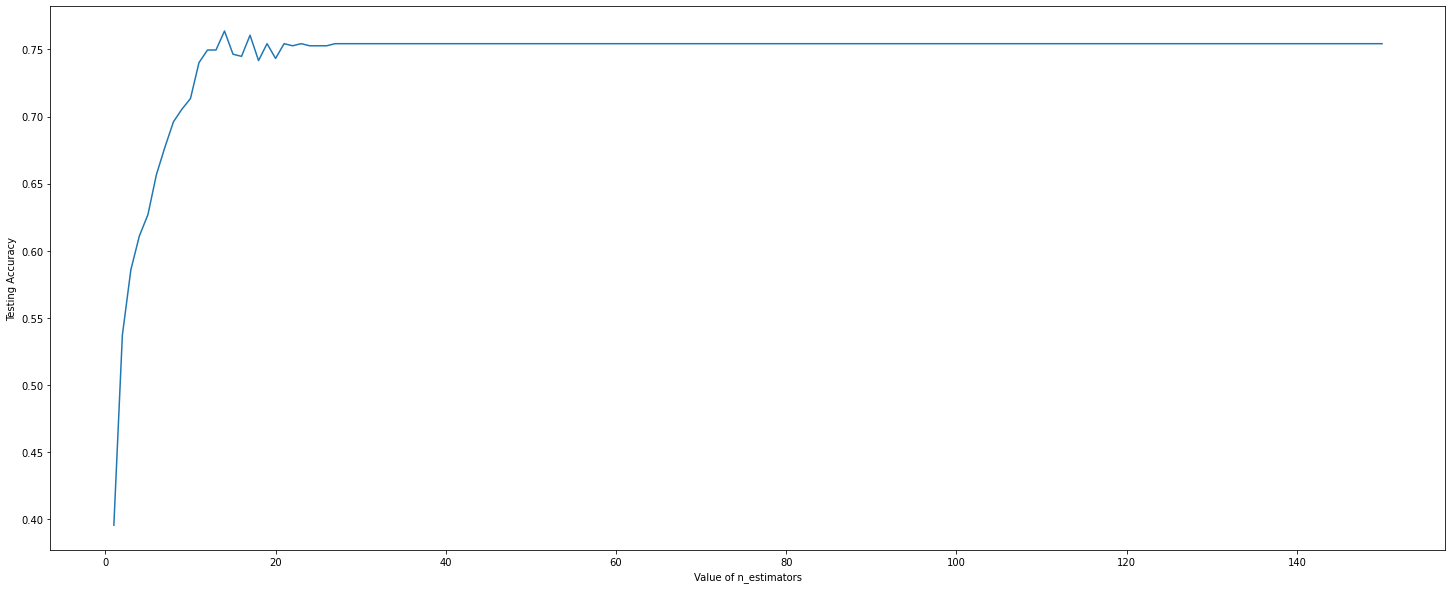

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[123  18  20   2]
 [ 22 116   6   1]
 [ 19  12 117  20]
 [ 11   5  18 125]]
              precision    recall  f1-score   support

           0       0.70      0.75      0.73       163
           1       0.77      0.80      0.78       145
           2       0.73      0.70      0.71       168
           3       0.84      0.79      0.81       159

    accuracy                           0.76       635
   macro avg       0.76      0.76      0.76       635
weighted avg       0.76      0.76      0.76       635

Accurecy:  0.75748031496063


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[126  16  19   2]
 [ 20 117   6   2]
 [ 23   9 118  18]
 [ 13   5  17 124]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       163
           1       0.80      0.81      0.80       145
           2       0.74      0.70      0.72       168
           3       0.85      0.78      0.81       159

    accuracy                           0.76       635
   macro avg       0.77      0.77      0.77       635
weighted avg       0.77      0.76      0.76       635

Accurecy:  0.7637795275590551


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[126  16  19   2]
 [ 20 117   6   2]
 [ 23  10 116  19]
 [ 11   6  17 125]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       163
           1       0.79      0.81      0.80       145
           2       0.73      0.69      0.71       168
           3       0.84      0.79      0.81       159

    accuracy                           0.76       635
   macro avg       0.77      0.76      0.76       635
weighted avg       0.76      0.76      0.76       635

Accurecy:  0.7622047244094489




---



---



#XGB

In [36]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[114  27  20   2]
 [ 35  93  12   5]
 [ 29  16  97  26]
 [ 12  12  12 123]]
              precision    recall  f1-score   support

           0       0.60      0.70      0.65       163
           1       0.63      0.64      0.63       145
           2       0.69      0.58      0.63       168
           3       0.79      0.77      0.78       159

    accuracy                           0.67       635
   macro avg       0.68      0.67      0.67       635
weighted avg       0.68      0.67      0.67       635

Accurecy:  0.6724409448818898


1/250 round completed......................... Accurecy: 0.5606299212598426
2/250 round completed......................... Accurecy: 0.573228346456693
3/250 round completed......................... Accurecy: 0.573228346456693
4/250 round completed......................... Accurecy: 0.5811023622047244
5/250 round completed......................... Accurecy: 0.5826771653543307
6/250 round completed......................... Accurecy: 0.584251968503937
7/250 round completed......................... Accurecy: 0.5826771653543307
8/250 round completed......................... Accurecy: 0.584251968503937
9/250 round completed......................... Accurecy: 0.5921259842519685
10/250 round completed......................... Accurecy: 0.5921259842519685
11/250 round completed......................... Accurecy: 0.5889763779527559
12/250 round completed......................... Accurecy: 0.5937007874015748
13/250 round completed......................... Accurecy: 0.5921259842519685
14/250 round

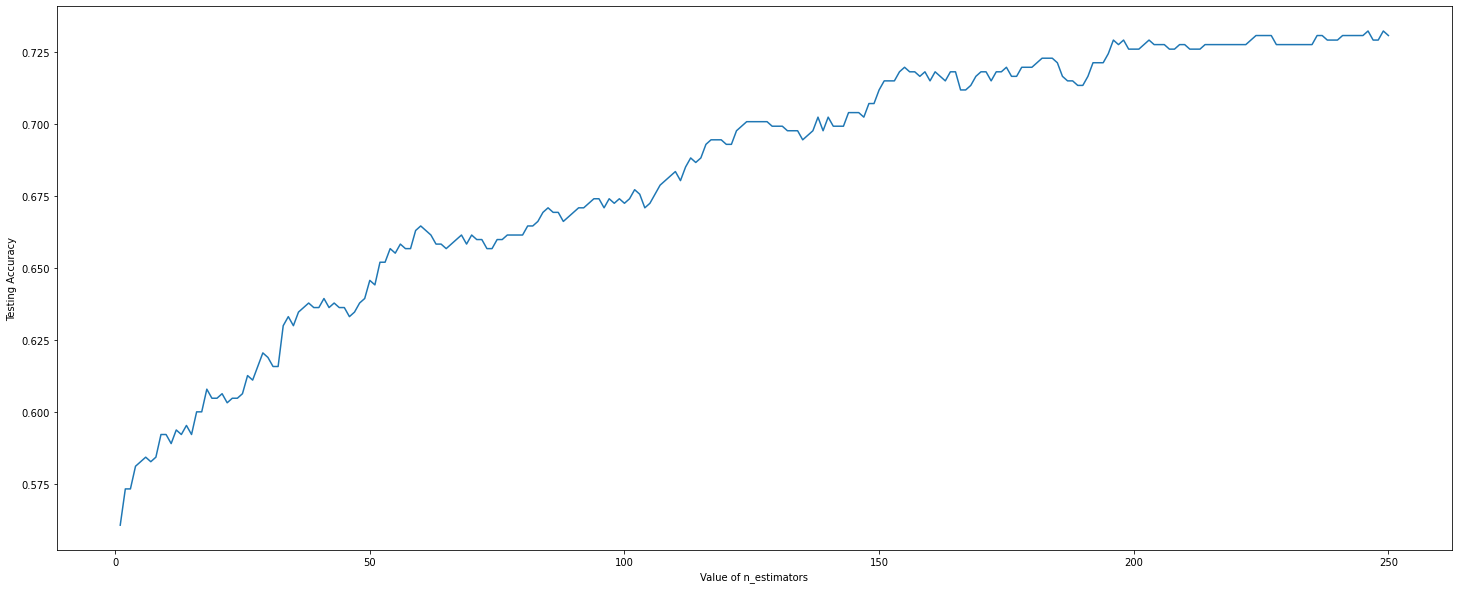

In [37]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

1/250 round completed......................... Accurecy: 0.5795275590551181
2/250 round completed......................... Accurecy: 0.6267716535433071
3/250 round completed......................... Accurecy: 0.6724409448818898
4/250 round completed......................... Accurecy: 0.7275590551181103
5/250 round completed......................... Accurecy: 0.7433070866141732
6/250 round completed......................... Accurecy: 0.75748031496063
7/250 round completed......................... Accurecy: 0.7732283464566929
8/250 round completed......................... Accurecy: 0.7590551181102362
9/250 round completed......................... Accurecy: 0.7606299212598425
10/250 round completed......................... Accurecy: 0.7637795275590551
11/250 round completed......................... Accurecy: 0.7622047244094489
12/250 round completed......................... Accurecy: 0.7559055118110236
13/250 round completed......................... Accurecy: 0.75748031496063
14/250 round

In [ ]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

In [ ]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

In [ ]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)



---



---



#Result

In [ ]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


In [ ]:
print("best_models:")
for i in best_models:
  print(i)


In [ ]:
len(best_models)

#Testing Accuracy For Best 4 Models

In [ ]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_train)
  print(confusion_matrix(y_train, y_pred))
  print(classification_report(y_train,y_pred))
  print("Accurecy: ",accuracy_score(y_train, y_pred))

#ROC

In [ ]:
!pip install plotly==5.11.0
!pip install -U kaleido


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC(model,X,y,fig_name):
    
    lebel_dict={
    0: 'Reading',
    1: 'Resting',
    2: 'Walking',
    3: 'Working'
    }

    y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=1000, height=1000,
        font=dict(
            family="Courier New, monospace",
            size=20,
            color="BLack"
        ),
        legend=dict(
            x=0.67,
            y=0.05,
            traceorder="reversed",
            title_font_family="Times New Roman",
            font=dict(
                family="Courier New, monospace",
                size=20,
                color="black"
            ),
            bgcolor="LightSteelBlue",
            bordercolor="White",
            borderwidth=2
        )
    )
    fig.show()
    fig.write_image(fig_name+".png")

#SHAP

In [ ]:
!pip install shap
import shap

In [ ]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [ ]:
new_keys_7=models_check_box(models)

In [ ]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

# **LIME**

In [ ]:
!pip install lime

In [ ]:

import lime
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=list(X.columns),
    class_names=['Reading', 'Resting', 'Walking', 'Working'],
    mode='classification'
)
     

In [ ]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME


exp = explainer.explain_instance(X_test.iloc[row],
                                 gradBoost_estimator.predict_proba,               #here write the model name
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=True)



from IPython.display import HTML

html_data = exp.as_html()
HTML(data=html_data)


exp.save_to_file("classif_explanation.html")

In [ ]:
import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()